# Überprüfung des HACI-Startzeitpunktes

Bei der bsherigen Betrachtung der Fälle, fällt auf, dass bereits vor dem CI-Zeitpunkt Radarrefelktivitätsfaktorwerte Z von mehr als 35 dBZ erreicht werden. Entweder läuft hier etwas im HACI-Algorithmus schief, oder die Starzeiten sind falsch. Das sollten wir im Folgenden überprüfen.

Dafür benötigen wir einige Pakete.

In [1]:
import numpy as np
import pandas as pd
import load_satellite_data as lsd
from io_tools import radolan
import sys

from standard_config import *
sys.path.append("{}/test/haci".format(local_home_path))

import haci as hci
import datetime

/vols/talos/local/anaconda2-5.0.0/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from plotting_tools.colormaps import radar_cmap as rc
import fixed_colourbar as fc

Dann lassen wir HACI doch mal für einen Beispieltag laufen.

In [4]:
dt = datetime.datetime(2013,8,24)
rx_root = '/vols/talos/datasets/radolan/rx_hdcp2/'
ifile = '{root}/{dt:%Y}/hdfd_miub_drnet00_l3_dbz_v00_{dt:%Y%m%d}000000.nc'.format(root=rx_root,dt=dt)

In [5]:
rx = hci.read_rx_hdcp2(ifile)

In [6]:
rx.dbz.data[144]

array([[250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       ...,
       [250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250]], dtype=uint8)

Dann sehen wir uns doch mal einen Ausschnitt an.

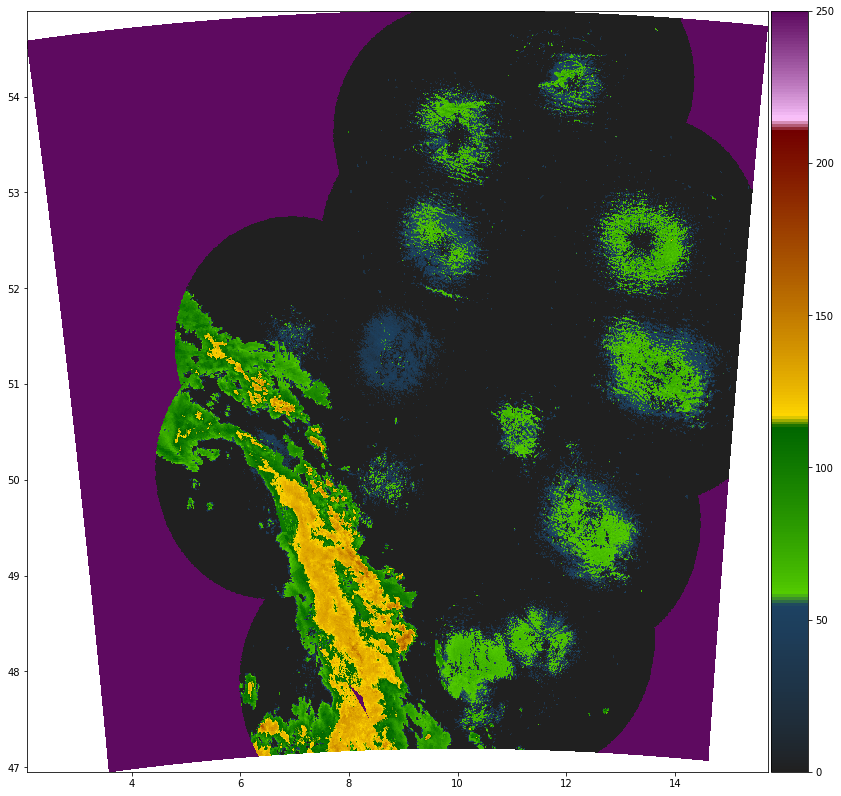

In [10]:
fig,ax = plt.subplots(1,1,figsize=(14,14))
rx_plot = ax.pcolormesh(rx.lon.data,rx.lat.data,rx.dbz[144].data,vmin=0,vmax=250,cmap=rc())
fc.colourbar(rx_plot)

Die RADOLAN-RX-Daten werden unkalibriert eingelesen. Das ist ein wenig seltsam, aber die restlichen Routinen erwarten das so. Vielleicht sollte man das ändern, um auch die RX-Daten direkt vom DWD einlesen zu können.

Eine kalibrierte Ansicht sieht so aus.

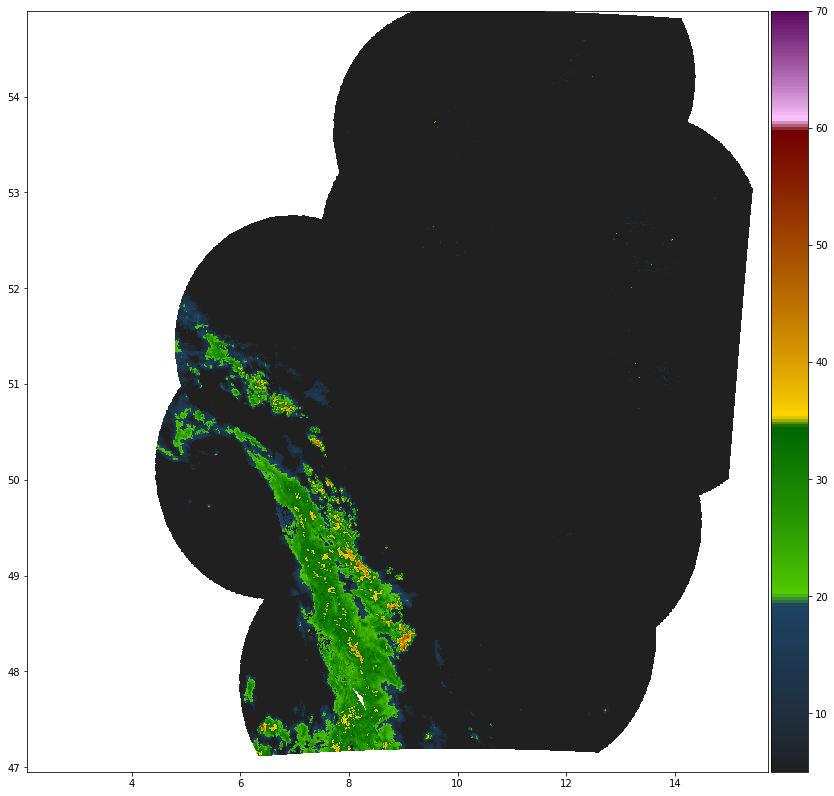

In [9]:
dbz = rx.dbz.data[144] * rx.dbz.attrs['scale_factor'] + rx.dbz.attrs['add_offset']
dbz[dbz<5] = 0
fig,ax = plt.subplots(1,1,figsize=(14,14))
rx_plot = ax.pcolormesh(rx.lon.data,
                        rx.lat.data,
                        np.ma.masked_greater_equal(dbz,92.5),
                        vmin=5,vmax=70,cmap=rc())
fc.colourbar(rx_plot)

Als nächstes suchen wir uns HACI-Objekte.

In [11]:
objprops = hci.detect_ci(rx,thresh=35,radius=15)

0
1
2
3
4


In [14]:
objprops.iloc[428]

time     2013-08-24 14:40:00
id                       429
flags                      0
t0                       176
t1                       182
l00                      190
l01                      198
c00                      500
c01                      507
l0                       189
l1                       241
c0                       460
c1                       514
Name: 2013-08-24-000429, dtype: object

Dann suchen wir uns mal nur die Objekte heraus, die mindestens 30 Minuten vorhanden sind.

In [21]:
obj = objprops[(objprops.t1 - objprops.t0) >= 5]

In [22]:
obj

,time,id,flags,t0,t1,l00,l01,c00,c01,l0,l1,c0,c1
2013-06-18-000020,2013-06-18 00:10:00,20,0,2,8,332,333,347,348,332,335,347,349
2013-06-18-000021,2013-06-18 00:10:00,21,0,2,8,367,368,281,282,367,368,281,282
2013-06-18-000025,2013-06-18 00:10:00,25,0,2,8,468,471,381,385,467,481,381,404
2013-06-18-000040,2013-06-18 00:15:00,40,0,3,9,214,215,583,584,214,216,582,584
2013-06-18-000116,2013-06-18 00:40:00,116,0,8,14,351,354,741,742,350,356,741,749
2013-06-18-000124,2013-06-18 00:40:00,124,0,8,13,796,797,393,394,795,798,393,400
2013-06-18-000146,2013-06-18 00:50:00,146,0,10,15,738,739,308,309,738,739,308,309
2013-06-18-000180,2013-06-18 01:00:00,180,0,12,17,378,379,255,256,378,379,254,256
2013-06-18-000203,2013-06-18 01:05:00,203,0,13,19,549,553,715,718,548,559,713,743
2013-06-18-000207,2013-06-18 01:05:00,207,0,13,19,623,625,821,826,622,638,820,853


Danach erzeugen wir uns Ausschnitte der Objekte 5 Minuten vor dem angegebene Startzeitpunkt, um zu sehen, ob da Z > 35 dBZ.

In [90]:
bewertungen = dict()
bewertungen_t0 = dict()
ausschnitte = dict()
ausschnitte_t0 = dict()
for i, row in obj.iterrows():
    rmin = np.clip(row.l00 - 10, 0, 900)
    rmax = np.clip(row.l01 + 10, 0, 900)
    cmin = np.clip(row.c00 - 10, 0, 900)
    cmax = np.clip(row.c01 + 10, 0, 900)
    
    ausschnitt = rx.dbz.data[row.t0 - 1][rmin:rmax, cmin:cmax]
    ausschnitt = ausschnitt * rx.dbz.attrs['scale_factor'] + rx.dbz.attrs['add_offset']
    ausschnitt_t0 = rx.dbz.data[row.t0][rmin:rmax, cmin:cmax]
    ausschnitt_t0 = ausschnitt_t0 * rx.dbz.attrs['scale_factor'] + rx.dbz.attrs['add_offset']
    
    ausschnitte[row.id] = ausschnitt
    ausschnitte_t0[row.id] = ausschnitt_t0
    
    if np.any(ausschnitt >= 35):
        bewertungen[row.id] = 1
    else:
        bewertungen[row.id] = 0
        
    if np.any(ausschnitt_t0 >= 35):
        bewertungen_t0[row.id] = 1
    else:
        bewertungen_t0[row.id] = 0

In [ ]:
a = getattr(arr,'scale_factor')
        b = getattr(arr,'add_offset')
        thresh = (thresh-b)/a

In [37]:
rx.dbz.attrs['add_offset']

-32.5

In [91]:
print(row.id,rmin,rmax,cmin,cmax,row.t0)

(2878L, 272, 294, 642, 663, 283L)


Text(0.5,1,'$t_\\mathrm{CI}$')

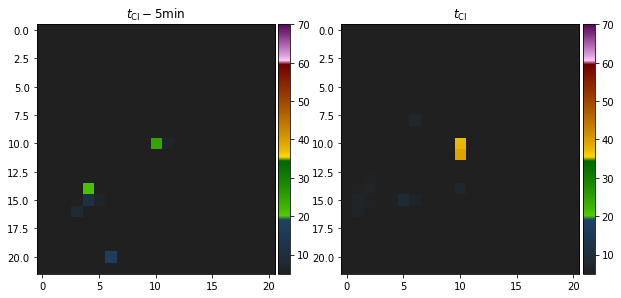

In [92]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
a0_plot = ax[0].imshow(ausschnitt,vmin=5,vmax=70,cmap=rc())
fc.colourbar(a0_plot)
ax[0].set_title(r"$t_\mathrm{CI} - 5 \mathrm{min}$")
a1_plot = ax[1].imshow(ausschnitt_t0,vmin=5,vmax=70,cmap=rc())
fc.colourbar(a1_plot)
ax[1].set_title(r"$t_\mathrm{CI}$")

Das passt. Fünf Minuten vor dem angegeben CI-Zeitpunkt ist Z noch kleiner als 35 dBZ. Aber sehen wir uns das doch auch mal für die anderen Fälle an.

In [104]:
bw = [b >0 for b in bewertungen.values()]
print(bw)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [105]:
bw_t0 = [b >0 for b in bewertungen_t0.values()]
print(bw_t0)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


Das passt. Fünf Minuten for dem CI-Zeitpunkt sind die Z-Werte noch kleiner als 35 dBZ und zum CI-Zeitpunkt gibt es Werte mit Z &geq; 35 dBZ. Also läuft bei der Erzeugung der Fallausschnitte etwas schief.